# Loading Important Liabraries 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

import warnings
warnings.filterwarnings("ignore")

In [6]:
df = pd.read_csv("adult.csv")
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Data-Processing

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [8]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [10]:
df["workclass"].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [11]:
df["occupation"].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [12]:
df["native-country"].value_counts()

United-States                 43832
Mexico                          951
?                               857
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Guatemala                        88
Poland                           87
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru                        

In [13]:
df["marital-status"].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [14]:
df["race"].value_counts()

White                 41762
Black                  4685
Asian-Pac-Islander     1519
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [15]:
df["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [16]:
df["education"].value_counts()

HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64

In [22]:
df.isin(['?',"-"]).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [24]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [25]:
df['age'].value_counts()

36    1348
35    1337
33    1335
23    1329
31    1325
      ... 
88       6
85       5
87       3
89       2
86       1
Name: age, Length: 74, dtype: int64

In [26]:
df['occupation'].value_counts()

Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

# Handling Missing Values:

- replacing values with the mode

In [18]:
df["workclass"] = df["workclass"].fillna(df["workclass"].mode())
df["occupation"] = df["occupation"].fillna(df["occupation"].mode())
df["native-country"] = df["native-country"].fillna(df["native-country"].mode())

In [19]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [17]:
df.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

# Feature Engineering

In [18]:
#education category
df.education = df.education.replace(["Preschool","1st-4th","5th-6th","7th-8th","9th","10th","11th","12th"],"school")
df.education = df.education.replace("HS-grad","high-school")
df.education = df.education.replace(["Assoc-acdm","Prof-school","Assoc-voc","Some-college"],"higher")
df.education = df.education.replace("Bachelors","grad")
df.education = df.education.replace("Masters","post-grad")
df.education = df.education.replace("Doctorate","doc") 

In [19]:
#marital status
df["marital-status"]=df["marital-status"].replace(["Married-civ-spouse","Married-AF-spouse"],"married")
df["marital-status"]=df["marital-status"].replace("Never-married","un-married")
df["marital-status"]=df["marital-status"].replace(["Divorced","Separated","Widowed","Married-spouse-absent"],"other")

In [20]:
#income
df.income = df.income.replace("<=50K",0)
df.income = df.income.replace(">50K",1)

In [21]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,school,7,un-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,high-school,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,higher,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,higher,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,higher,10,un-married,?,Own-child,White,Female,0,0,30,United-States,0


In [22]:
df["marital-status"].value_counts()

married       22416
un-married    16117
other         10309
Name: marital-status, dtype: int64

In [22]:
df["education"].value_counts()

high-school    15784
higher         15374
grad            8025
school          6408
post-grad       2657
doc              594
Name: education, dtype: int64

# Visualisation and Model Creation

In [23]:
df.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558,0.230369
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519,-0.006339
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689,0.332613
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157,0.223013
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467,0.147554
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000,0.227687
income,0.230369,-0.006339,0.332613,0.223013,0.147554,0.227687,1.000000


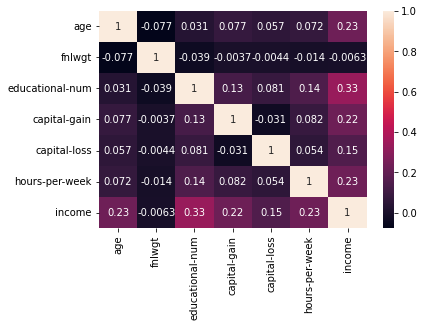

In [24]:
sns.heatmap(df.corr(),annot = True);

In [25]:
x = df.drop(["fnlwgt"],axis=1)
x

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,school,7,un-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,high-school,9,married,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,higher,12,married,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,higher,10,married,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,higher,10,un-married,?,Own-child,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,higher,12,married,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,high-school,9,married,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,high-school,9,other,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,high-school,9,un-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


# Histogram

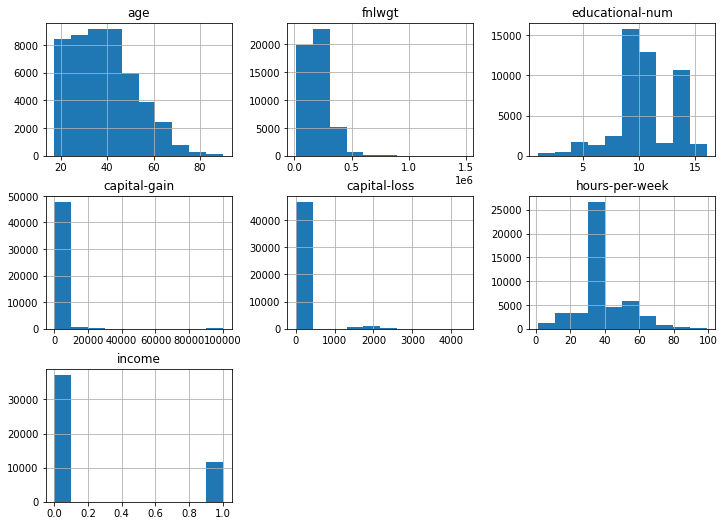

In [26]:
df.hist(figsize=(12,12),layout=(4,3),sharex=False);

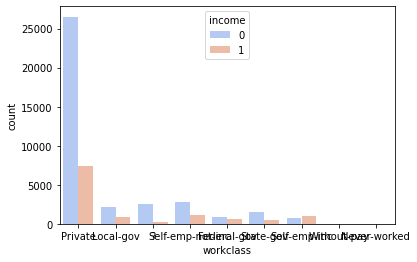

In [27]:
sns.countplot(df["workclass"],palette='coolwarm', hue="income",data=df);

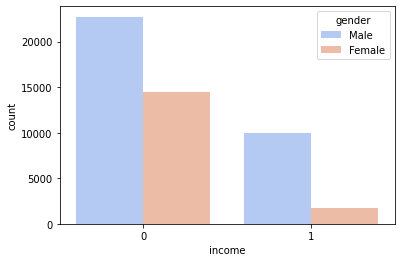

In [28]:
sns.countplot(df['income'],palette='coolwarm', hue="gender",data=df);

# Model building

In [30]:
x = df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [31]:
x

array([[25, 'Private', 226802, ..., 0, 40, 'United-States'],
       [38, 'Private', 89814, ..., 0, 50, 'United-States'],
       [28, 'Local-gov', 336951, ..., 0, 40, 'United-States'],
       ...,
       [58, 'Private', 151910, ..., 0, 40, 'United-States'],
       [22, 'Private', 201490, ..., 0, 20, 'United-States'],
       [52, 'Self-emp-inc', 287927, ..., 0, 40, 'United-States']],
      dtype=object)

In [32]:
y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

# Label Encoding and Feature Scaling 

In [33]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [34]:
df=df.apply(LabelEncoder().fit_transform)
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,8,4,19329,5,6,2,7,3,2,1,0,0,39,39,0
1,21,4,4212,2,8,0,5,0,4,1,0,0,49,39,0
2,11,2,25340,3,11,0,11,0,4,1,0,0,39,39,1
3,27,4,11201,3,9,0,7,0,2,1,98,0,39,39,1
4,1,0,5411,3,9,2,0,3,4,0,0,0,29,39,0


In [35]:
ss=StandardScaler().fit(df.drop("income",axis=1))

In [36]:
x=ss.transform(df.drop("income",axis=1))
y=df["income"]

# Model Selection

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Training the Model

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.30, random_state=1)

In [39]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()

In [40]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred = model.predict(xtest)
    print(classification_report(ytest,ypred))
    return model

In [41]:
mymodel(lr)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11112
           1       0.72      0.56      0.63      3541

    accuracy                           0.84     14653
   macro avg       0.80      0.75      0.77     14653
weighted avg       0.83      0.84      0.83     14653



LogisticRegression()

In [42]:
mymodel(dt)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     11112
           1       0.62      0.64      0.63      3541

    accuracy                           0.82     14653
   macro avg       0.75      0.75      0.75     14653
weighted avg       0.82      0.82      0.82     14653



DecisionTreeClassifier()

# Hypertuning Prarmeters

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error ,mean_squared_error

In [44]:
from sklearn.model_selection import GridSearchCV
#DecisionTreeClassifier

params = {'max_depth': [2, 3, 5, 10, 20],
          'min_samples_leaf': [5, 10, 20, 50, 100,150],
          'criterion': ["gini", "entropy"]}

grid_search = GridSearchCV(estimator=dt, param_grid=params,cv=5, n_jobs=1, verbose=1, scoring = "accuracy")
grid_search.fit(xtrain, ytrain)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 150]},
             scoring='accuracy', verbose=1)

In [45]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018749,0.006248,0.006249,0.007653,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.829921,0.829629,0.831676,0.824364,0.82741,0.8286,0.002515,49
1,0.029425,0.013651,0.000400,0.000800,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.829921,0.829629,0.831676,0.824364,0.82741,0.8286,0.002515,49
2,0.034373,0.006250,0.003124,0.006248,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.829921,0.829629,0.831676,0.824364,0.82741,0.8286,0.002515,49
3,0.028124,0.011691,0.006248,0.007652,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.829921,0.829629,0.831676,0.824364,0.82741,0.8286,0.002515,49
4,0.032148,0.001803,0.000000,0.000000,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.829921,0.829629,0.831676,0.824364,0.82741,0.8286,0.002515,49


In [46]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 50}

In [47]:
grid_search.best_score_

0.8559770587434311

In [48]:
dt_tuned = DecisionTreeClassifier(criterion="gini",max_depth=20,min_samples_leaf=50)
dt_tuned.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=20, min_samples_leaf=50)

In [49]:
y_pred_dt_tuned = dt_tuned.predict(xtest)
print("DecisionTreeClassifier:")
print('Accuracy score:', round(accuracy_score(ytest, y_pred_dt_tuned) * 100, 3))
print("F1 Score: ", round(f1_score(ytest,y_pred_dt_tuned) * 100,3))
print("MSE: ", round(mean_squared_error(ytest,y_pred_dt_tuned) * 100,3))

DecisionTreeClassifier:
Accuracy score: 85.668
F1 Score:  67.126
MSE:  14.332


- Here we have used some models like Logistic regression,Decision Tree Classifier,Random Forest.
- The highest accuracy score of 85.66 from a Tuned Decision Tree. 